##Exercise 5 - Part B: Cat vs. Dog Image Classification Using Transfer Learning


## Import

In [ ]:
import os
import zipfile
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

## Download Data

In [ ]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

--2022-05-23 14:13:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   275MB/s    in 0.2s    

2022-05-23 14:13:24 (275 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Define VGG16 Model

In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset

# define cnn model
def define_model():

	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
 
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
 
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
 
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# plot diagnostic learning curves
def summarize_diagnostics(history):

	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
 
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
 

# run the test harness for evaluating a model
def run_test_harness():

  # define model
  model = define_model()

  # create data generator
  datagen = ImageDataGenerator(featurewise_center=True)

  # specify imagenet mean values for centering
  datagen.mean = [123.68, 116.779, 103.939]

  # prepare iterator
  train_it = datagen.flow_from_directory('/tmp/cats_and_dogs_filtered/train', class_mode='binary', batch_size=64, target_size=(224, 224))
  test_it = datagen.flow_from_directory('/tmp/cats_and_dogs_filtered/validation', class_mode='binary', batch_size=64, target_size=(224, 224))

  # fit model
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)

  # evaluate model
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
  print('> %.3f' % (acc * 100.0))

  # learning curves
  summarize_diagnostics(history)
  
  return model


58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
32/32 [==============================] - 39s 677ms/step - loss: 1.5181 - accuracy: 0.9215 - val_loss: 0.3904 - val_accuracy: 0.9580
Epoch 2/10
32/32 [==============================] - 17s 523ms/step - loss: 0.1444 - accuracy: 0.9680 - val_loss: 0.1282 - val_accuracy: 0.9730
Epoch 3/10
32/32 [==============================] - 18s 560ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.1305 - val_accuracy: 0.9700
Epoch 4/10
32/32 [==============================] - 17s 534ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.1330 - val_accuracy: 0.9700
Epoch 5/10
32/32 [==============================] - 17s 540ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1344 - val_accuracy: 0.9710
Epoch 6/10
32/32 [==============================] - 17s 544ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1358 - val_accuracy: 0.9720
Epoch 7/10
32/32 [==============================] - 17s 539ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.1368 - val_accuracy: 0.9720

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


> 97.200


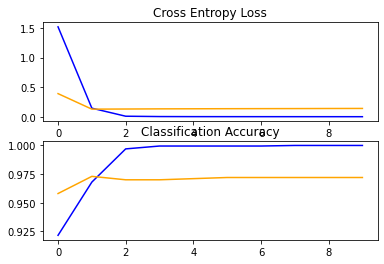

In [ ]:
# entry point, run the test harness
model = run_test_harness()

**The model accuracy is 97.200!**

## Predict

In [ ]:
# load and prepare the image
def load_image(filename):

	# load the image
	img = load_img(filename, target_size=(224, 224))
 
	# convert to array
	img = img_to_array(img)
 
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
 
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img


def prediction(namecode):
    if namecode == 0:
        return "cat"
    return "dog"  # namecode == 1


load the image and predict the class:

The cat is classified as: cat


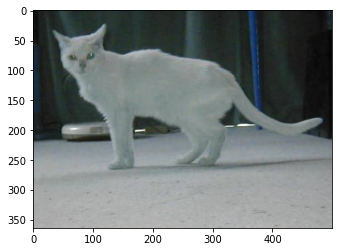


The cat is classified as: cat


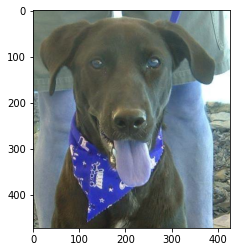

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt


cat_img = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2029.jpg'
print('\033[1m' + 'The cat is classified as: ' + prediction(round(model.predict(load_image(cat_img))[0][0])) + '\033[0m')
plt.imshow(cv2.imread(cat_img))
plt.show()

dog_img = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2042.jpg'
print('\n\033[1m' + 'The cat is classified as: ' + prediction(round(model.predict(load_image(cat_img))[0][0])) + '\033[0m')
plt.imshow(cv2.imread(dog_img))
plt.show()